<a href="https://colab.research.google.com/github/NatchayaSU/Depression-Detector-NLP/blob/main/Project_1101273_Ai_%2C_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project 73/dataoutput1.csv')

In [ ]:
# https://github.com/PyThaiNLP/pythainlp
# https://github.com/PyThaiNLP/wisesight-sentiment

!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 18.9 MB 5.3 MB/s 0:00:04
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 3.3 MB/s eta 0:00:00
  Created wheel for pythainlp: filename=pythainlp-4.0.0.dev0-py3-none-any.whl size=13392786 sha256=f31e0725927d12d848acea53997a460f7ffb7bc85681e22b976befbfeeddec5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ngwqv4o/wheels/51/04/24/dbbb71f7536162532b7e9d1103f43f48f2f93a8c42e5bdd32b
Successfully built pythainlp


In [ ]:
df

column  label       username    keywords  \
0          1      1      ptnutsuki       เศร้า   
1          2      1        sudkrub       เศร้า   
2          3      1  club_backyard       เศร้า   
3          4      1      The_TU_TA       เศร้า   
4          5      1       jhrxkha9       เศร้า   
...      ...    ...            ...         ...   
2395    2396      0     @Ket_sukon  เกิดมาทำไม   
2396    2397      0     lluke_atme  เกิดมาทำไม   
2397    2398      0    @GreenNutty  เกิดมาทำไม   
2398    2399      0      alum_itnw  เกิดมาทำไม   
2399    2400      0     @pp6dpppat  เกิดมาทำไม   

                                                content  
0     ตอนเป็นซึมเศร้าพ่อพามาอยู่ที่บ้านค่ะ ไม่พูดอะไ...  
1     เอาจริงๆ ครั้งแรกที่แม่ยอมปล่อยให้เราไปเที่ยวเ...  
2     ใช่ค่ะ โรคซึมเศร้าดีขึ้นเพราะการดูแลงู พอคิดว่...  
3     ทุกวันนี้ยังมีหลายคำถามที่ตัวเองตอบไม่ได้เกี่ย...  
4     คนที่เป็นโรคซึมเศร้าเหมือนเค้าอยากมาเมคเฟรนกัน...  
...                                                 ...  
2395  อย่าตั้งความหวังไว้สูงนัก ทำไม่ได้ขึ้นมามันเจ็...  
2396  อย่ามาทำอะไร ให้ต้องมาคอยตั้งคำถามว่า\n‘เกิดมา...  
2397  อย่าเอาทฤษฎีนั้นมาพูดกะเค้าาาาา T^T #ปวดหัว #ไ...  
2398                         อยู่ๆก็คิดว่าเราเกิดมาทำไม  
2399      อ่อนแอ ก็แพ้ไป\nภายใต้คำว่า #เกิดมาทำไม\n2\n4  

[2400 rows x 5 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   column    2400 non-null   int64 
 1   label     2400 non-null   int64 
 2   username  2400 non-null   object
 3   keywords  2400 non-null   object
 4   content   2400 non-null   object
dtypes: int64(2), object(3)
memory usage: 93.9+ KB


In [ ]:
df[['keywords', 'label']].value_counts()

keywords      label
หมดหวัง       0        323
เกิดมาทำไม    0        280
ท้อ           0        200
              1        200
อยากตาย       0        200
              1        200
เกลียดตัวเอง  0        200
              1        200
เศร้า         0        200
              1        200
เกิดมาทำไม    1        120
หมดหวัง       1         77
dtype: int64

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
font_path = '/content/thsarabunnew-webfont.ttf'

In [ ]:
# from unidecode import unidecode
import re
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib inline

In [ ]:

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

matplotlib.font_manager.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
matplotlib.rc("font", family='TH Sarabun New', size=16)

<AxesSubplot:>

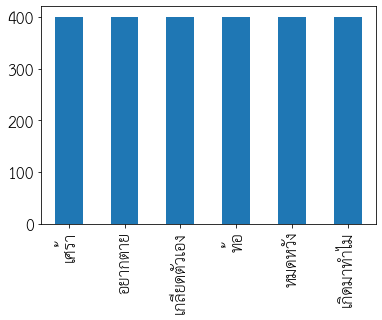

In [ ]:
df.keywords.value_counts().plot(kind='bar')

# **Clean Data**

In [ ]:
import numpy as np
import re
import regex

def clean_tweet(temp):
  if type(text) == np.float64:
        return ""
  temp = regex.sub('http\S+', 'url', temp )
  temp = regex.sub('[?#@]', '', temp )
  temp = regex.sub('[A-Za-z0-9_]+', '', temp )
  temp  = regex.sub('#[A-Za-z0-9_]+', '', temp )
  temp = "".join(c for c in temp if c not in ("?",".",";",":","!",'"',"ฯ","ๆ","|","/",",",")","("))

  return temp

IndentationError: ignored

In [ ]:
df['clean'] = df.content.apply(clean_tweet)

In [ ]:
df

column  label       username    keywords  \
0          1      1      ptnutsuki       เศร้า   
1          2      1        sudkrub       เศร้า   
2          3      1  club_backyard       เศร้า   
3          4      1      The_TU_TA       เศร้า   
4          5      1       jhrxkha9       เศร้า   
...      ...    ...            ...         ...   
2395    2396      0     @Ket_sukon  เกิดมาทำไม   
2396    2397      0     lluke_atme  เกิดมาทำไม   
2397    2398      0    @GreenNutty  เกิดมาทำไม   
2398    2399      0      alum_itnw  เกิดมาทำไม   
2399    2400      0     @pp6dpppat  เกิดมาทำไม   

                                                content  \
0     ตอนเป็นซึมเศร้าพ่อพามาอยู่ที่บ้านค่ะ ไม่พูดอะไ...   
1     เอาจริงๆ ครั้งแรกที่แม่ยอมปล่อยให้เราไปเที่ยวเ...   
2     ใช่ค่ะ โรคซึมเศร้าดีขึ้นเพราะการดูแลงู พอคิดว่...   
3     ทุกวันนี้ยังมีหลายคำถามที่ตัวเองตอบไม่ได้เกี่ย...   
4     คนที่เป็นโรคซึมเศร้าเหมือนเค้าอยากมาเมคเฟรนกัน...   
...                                                 ...   
2395  อย่าตั้งความหวังไว้สูงนัก ทำไม่ได้ขึ้นมามันเจ็...   
2396  อย่ามาทำอะไร ให้ต้องมาคอยตั้งคำถามว่า\n‘เกิดมา...   
2397  อย่าเอาทฤษฎีนั้นมาพูดกะเค้าาาาา T^T #ปวดหัว #ไ...   
2398                         อยู่ๆก็คิดว่าเราเกิดมาทำไม   
2399      อ่อนแอ ก็แพ้ไป\nภายใต้คำว่า #เกิดมาทำไม\n2\n4   

                                                  clean  
0     ตอนเป็นซึมเศร้าพ่อพามาอยู่ที่บ้านค่ะ ไม่พูดอะไ...  
1     เอาจริง ครั้งแรกที่แม่ยอมปล่อยให้เราไปเที่ยวเอ...  
2     ใช่ค่ะ โรคซึมเศร้าดีขึ้นเพราะการดูแลงู พอคิดว่...  
3     ทุกวันนี้ยังมีหลายคำถามที่ตัวเองตอบไม่ได้เกี่ย...  
4     คนที่เป็นโรคซึมเศร้าเหมือนเค้าอยากมาเมคเฟรนกัน...  
...                                                 ...  
2395  อย่าตั้งความหวังไว้สูงนัก ทำไม่ได้ขึ้นมามันเจ็...  
2396  อย่ามาทำอะไร ให้ต้องมาคอยตั้งคำถามว่า\n‘เกิดมา...  
2397  อย่าเอาทฤษฎีนั้นมาพูดกะเค้าาาาา ^ ปวดหัว ไอน์ส...  
2398                          อยู่ก็คิดว่าเราเกิดมาทำไม  
2399         อ่อนแอ ก็แพ้ไป\nภายใต้คำว่า เกิดมาทำไม\n\n  

[2400 rows x 6 columns]

# **Word Tokenise**



In [ ]:
def my_tokenise(txt):
  txt = word_tokenize(txt, keep_whitespace=False)
  return ' '.join(txt)

In [ ]:
df['token'] = df.clean.apply(my_tokenise)

NameError: ignored

In [ ]:
df

Column1  label       username      keywords  \
0           0      1        prtyfst  เกลียดตัวเอง   
1           1      1      fsj_hMoon       อยากตาย   
2           3      1  fromhellafter       อยากตาย   
3           4      1       Wiladda_       อยากตาย   
4           5      1     thawanpang       อยากตาย   
...       ...    ...            ...           ...   
1505     1507      0       khitaXXL  เกลียดตัวเอง   
1506     1508      0       mmyyyxx_    เกิดมาทำไม   
1507     1509      0   IO_from_Hell    เกิดมาทำไม   
1508     1510      0       giggokam    เกิดมาทำไม   
1509     1511      0         9uqmf1    เกิดมาทำไม   

                                                content  \
0                   เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้   
1                      เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย   
2     เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...   
3        ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ   
4                          อยากตายอยากตายอยากตายอยากตาย   
...                                                 ...   
1505  ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...   
1506  ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...   
1507  @BadStudent_ เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง...   
1508  (3) มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมี...   
1509  พวกมีแฟนแต่ทักหาคนไปทั่วเชิงชู้สาวแบบนี้เกิดมา...   

                                                  clean  \
0                   เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้   
1                      เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย   
2     เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...   
3        ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ   
4                          อยากตายอยากตายอยากตายอยากตาย   
...                                                 ...   
1505  ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...   
1506  ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...   
1507   เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง มึง หลอนหนั...   
1508   มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมีวูบ...   
1509  พวกมีแฟนแต่ทักหาคนไปทั่วเชิงชู้สาวแบบนี้เกิดมา...   

                                                  token  
0              เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้  
1                 เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย  
2     เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย...  
3     ปวดหัว ไม่ ไหว กับ อีก ทาง อห อยาก ตาย ตาม แม่...  
4                   อยาก ตาย อยาก ตาย อยาก ตาย อยาก ตาย  
...                                                 ...  
1505  ร้องไห้ เสียใจ อยู่ แต่ ดัน เจอ ผญ ตรง ไท ป์ ก...  
1506  ทำงาน จ - ส เป็น อะไร ที่ เหนื่อย มาก ใน ชีวิต...  
1507  เป็น ส้นตีน อะไร แดก ยา ไม่ ครบ รึ ไง มึง หลอน...  
1508  มี แต่ คำถาม มี แต่ คำพูด เข้ามา เอาจริง นะ มั...  
1509  พวก มี แฟน แต่ ทัก หา คน ไป ทั่ว เชิง ชู้สาว แ...  

[1510 rows x 7 columns]

In [ ]:
df.token.values

array(['เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้',
       'เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย',
       'เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย เรา รู้สึก แย่ ทุกวัน เรา อยาก ตาย เพราะ เขา รอบ ที่ เท่าไหร่ แล้วก็ ไม่ รู้ มี ฝน ตกใน ใจ ทุก วันแม่ ง แย่ สัส อยาก หนี ไป จาก ตรงนี้ อยาก พ้น ไม เน้อ สักที จะ ว่า เรา เห็นแก่ตัว ก็ได้ แต่ เรา เหนื่อย แล้ว จริง',
       ...,
       'เป็น ส้นตีน อะไร แดก ยา ไม่ ครบ รึ ไง มึง หลอน หนัก ชิบหาย วัน ทั้งวัน หมกหมุ่น แต่ เรื่อง ห่า อะไร ก็ ไม่ รู้ แม่ ง เกิด มา ทำไม ก็ ไม่ รู้ ทำ แต่ เรื่อง เหี้ย',
       'มี แต่ คำถาม มี แต่ คำพูด เข้ามา เอาจริง นะ มัน มี วูบ นึง ที่ โคตร จะ ไม่ อยาก ลืมตา ตื่นขึ้น มา บน โลก เลย อยู่ ทำไม วะ เกิด มา ทำไม แต่ อีก ใจ ก็ ต้องสู้ ดิ วะ จะ ยอมแพ้ ไม่ ได้ หือ ออ ออ ออ ออ ออ',
       'พวก มี แฟน แต่ ทัก หา คน ไป ทั่ว เชิง ชู้สาว แบบนี้ เกิด มา ทำไม'],
      dtype=object)

In [ ]:
' '.join(df.token.values)

"เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้ เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย เรา รู้สึก แย่ ทุกวัน เรา อยาก ตาย เพราะ เขา รอบ ที่ เท่าไหร่ แล้วก็ ไม่ รู้ มี ฝน ตกใน ใจ ทุก วันแม่ ง แย่ สัส อยาก หนี ไป จาก ตรงนี้ อยาก พ้น ไม เน้อ สักที จะ ว่า เรา เห็นแก่ตัว ก็ได้ แต่ เรา เหนื่อย แล้ว จริง ปวดหัว ไม่ ไหว กับ อีก ทาง อห อยาก ตาย ตาม แม่ ไป ด้วย อะ อยาก ตาย อยาก ตาย อยาก ตาย อยาก ตาย หุบปาก ซะ การกระทำ ของ คุณ จะ นำ คุณ ไป สู่ ความล้มเหลว และ ฉัน หวัง ว่า คุณ จะ ดู แย่ จน อยาก ตาย แค่ มอง กระจก ฉัน เกลียด คุณ มาก คุณ ไม่ สมควร ได้รับ สิ่ง นั้น ด้วยซ้ำ คุณ คือ ทุกสิ่ง ที่ น่ารังเกียจ ที่ มี อยู่ ใน โลก นี้ อยาก ตาย ให้ มัน รู้ ไป เลย ว่า ยัง คาดหวัง อะไร อยู่ ไหม อยาก ตาย อยู่ ทุกวัน เครียด อยาก ตาย แม่ ง ไม่ ได้ อยาก ตาย แต่ ไม่ อยาก ตื่นขึ้น มา เจอ เรื่อง ที่ เรา รู้สึก ว่า แย่ แม่ ง เป็น ความรู้สึก ที่ อึดอัด วะ สึม อยาก ตาย โก ด ตัวเอง ตกค่ำ แล้ว ดาวน์ มัน อยาก ตาย อยาก หาย ไป อีกแล้ว เกิด จาก ไร วะ เหนื่อย เบื่อชีวิต คิดไม่ออก หนึ่ง ใน 

# **Thai Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
thai_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords.update(['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','รับงาน','มั้ย',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','อ่ะ','กก',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ'])

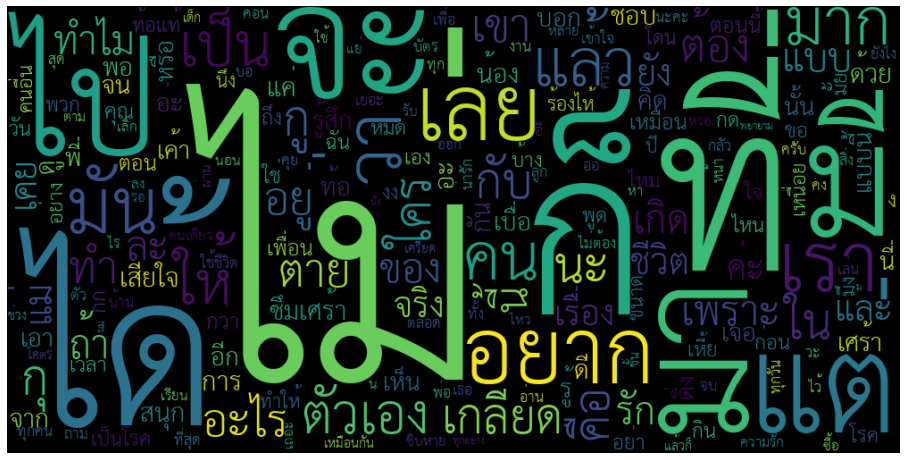

In [ ]:
wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words=200,
    collocations=False,).generate(' '.join(df.token.values))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [ ]:
import copy

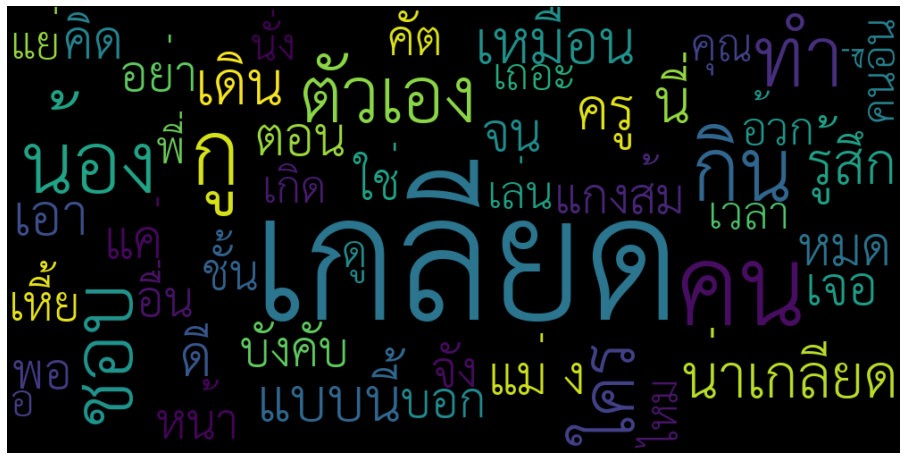

In [ ]:
teststop = copy.deepcopy(thai_stopwords)
# teststop.add('เกลียด')

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words=50,
    stopwords = teststop).generate(str(' '.join(df[df.keywords == 'เกลียด'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [ ]:
teststop

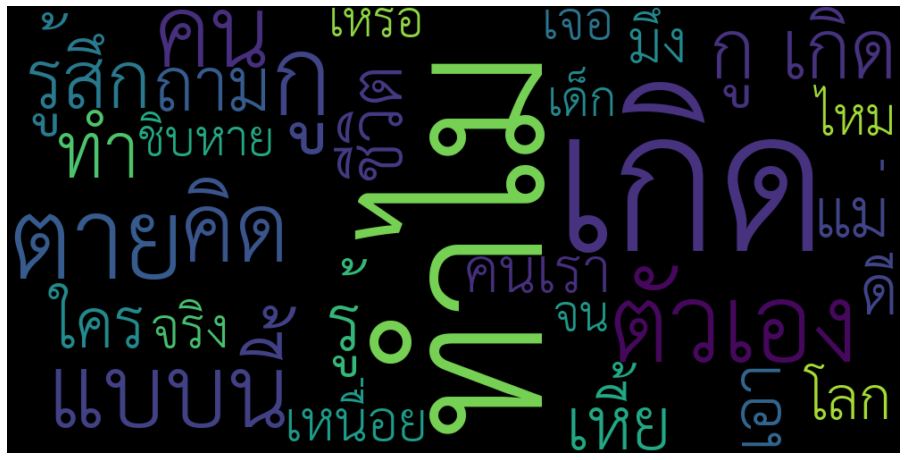

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words=30,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'เกิดมาทำไม'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

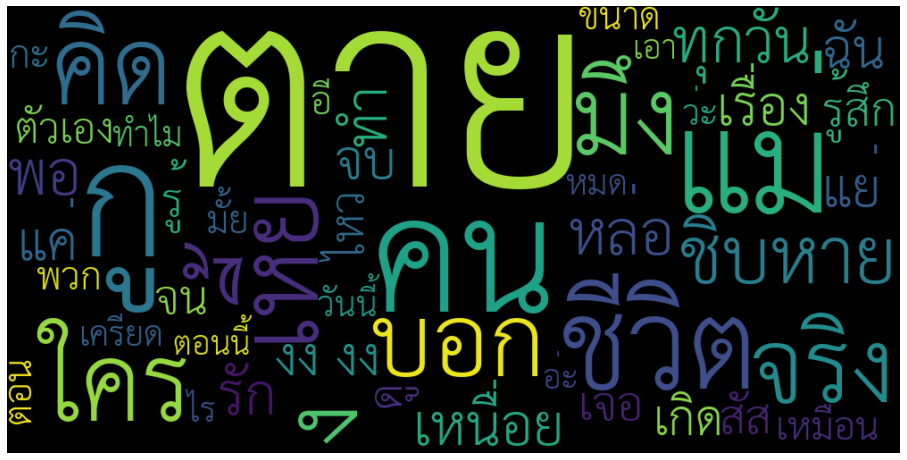

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'อยากตาย'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

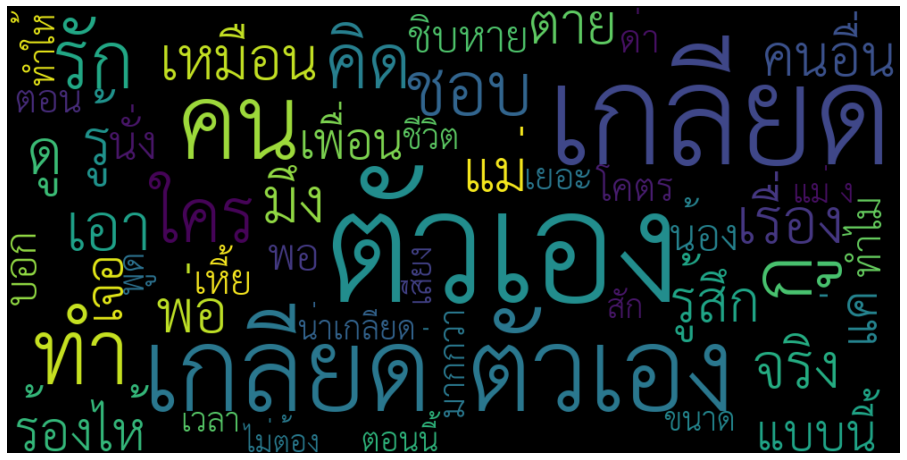

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'เกลียดตัวเอง'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

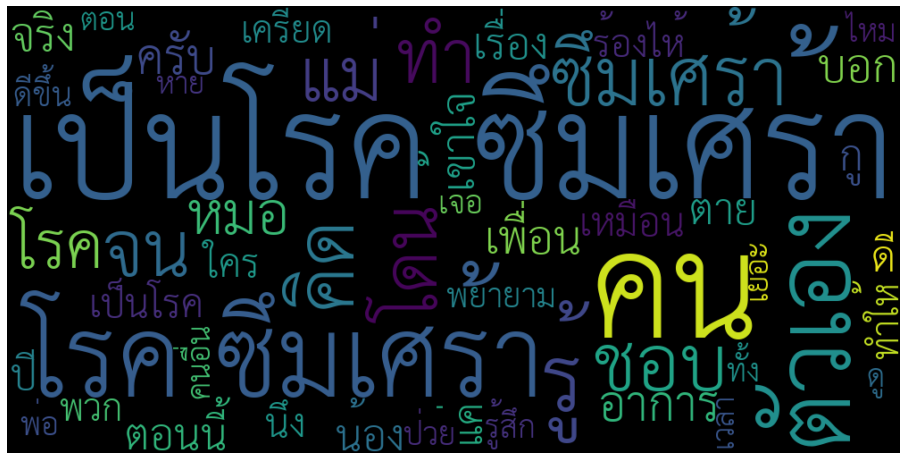

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'เป็นโรคซึมเศร้า'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

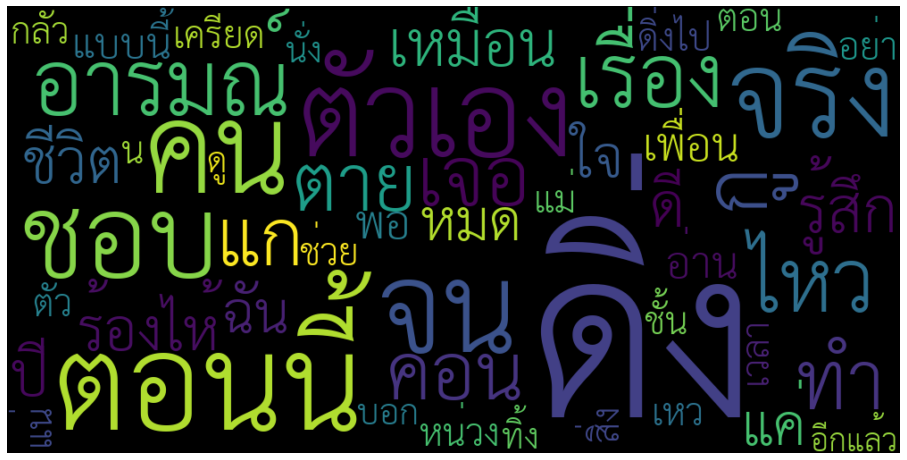

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'ดิ่ง'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

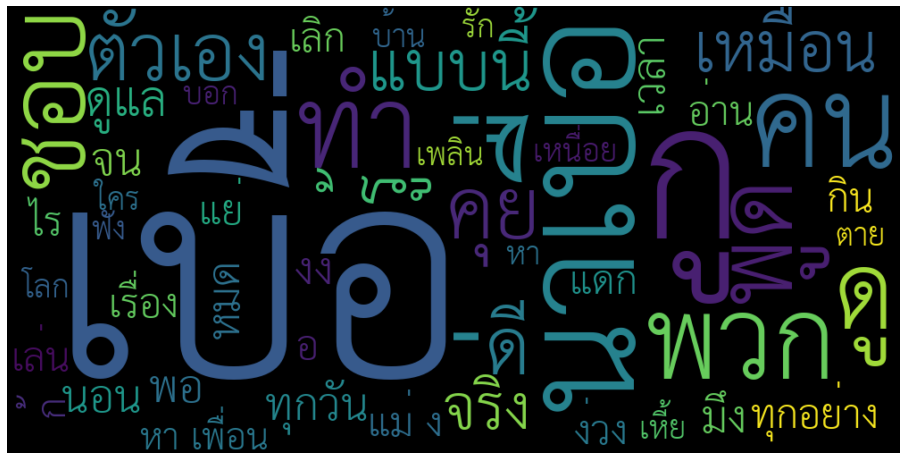

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย','ค่า',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่','ออ',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'เบื่อ'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

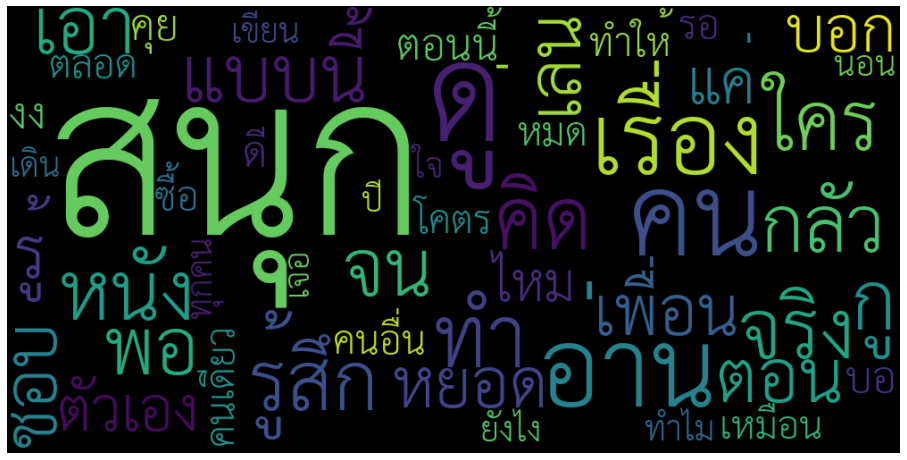

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย','ค่า',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่','ออ',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'ไม่สนุก'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

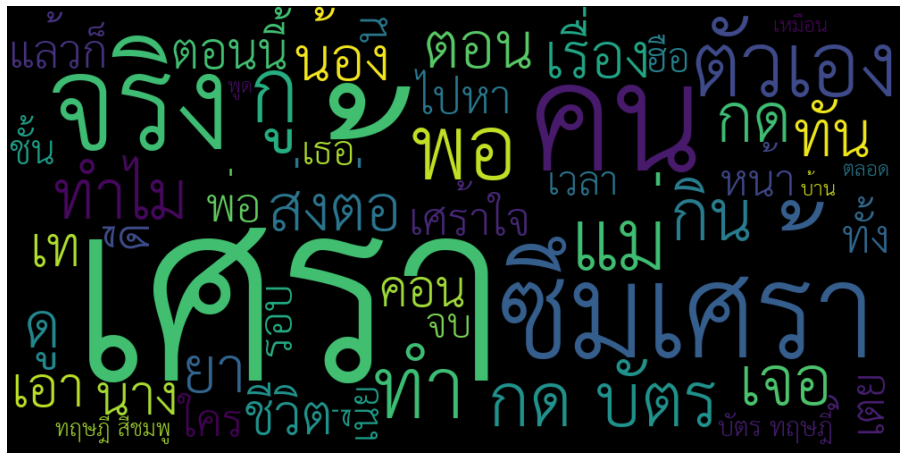

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย','ค่า',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่','ออ',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'เศร้า'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

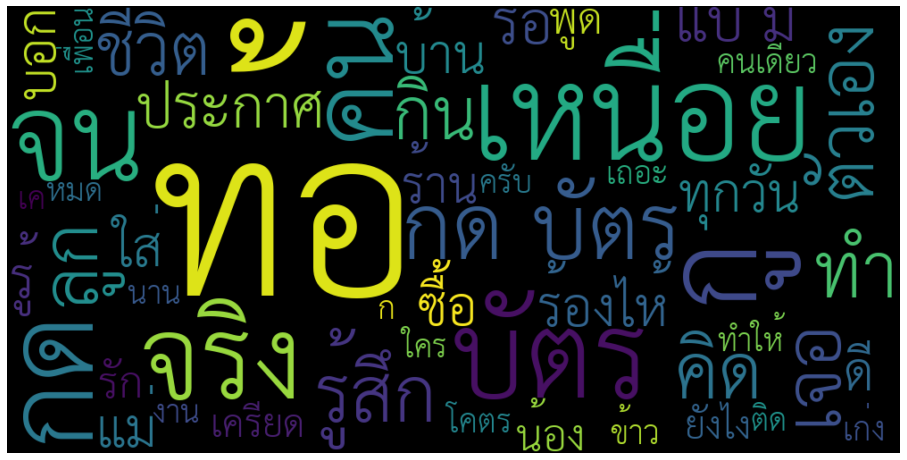

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย','ค่า',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่','ออ',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'ท้อ'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

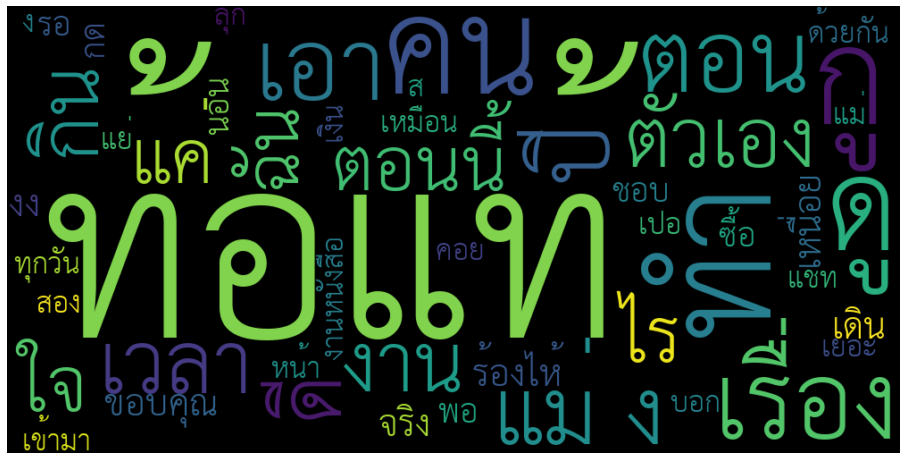

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่','อ่ะ','ไง',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก','มั้ย','ค่า',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง','ใช่','ออ',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'ท้อแท้'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

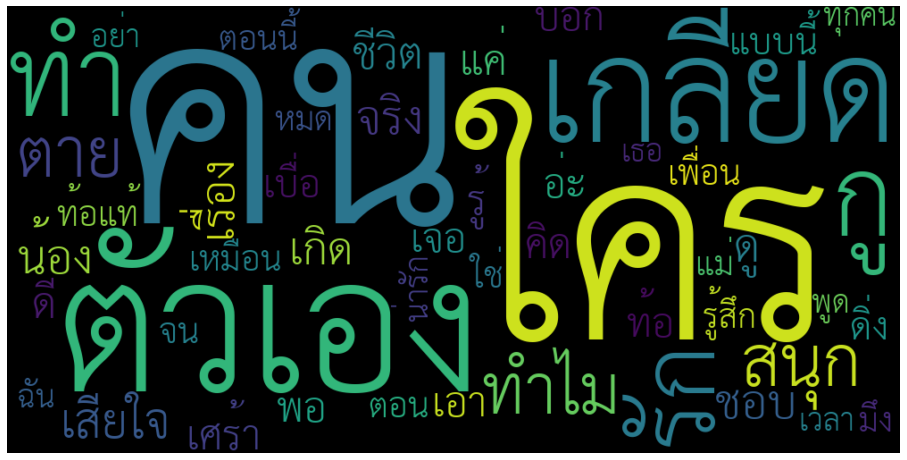

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[(df.keywords == 'ท้อแท้') | (df.label == 0)].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

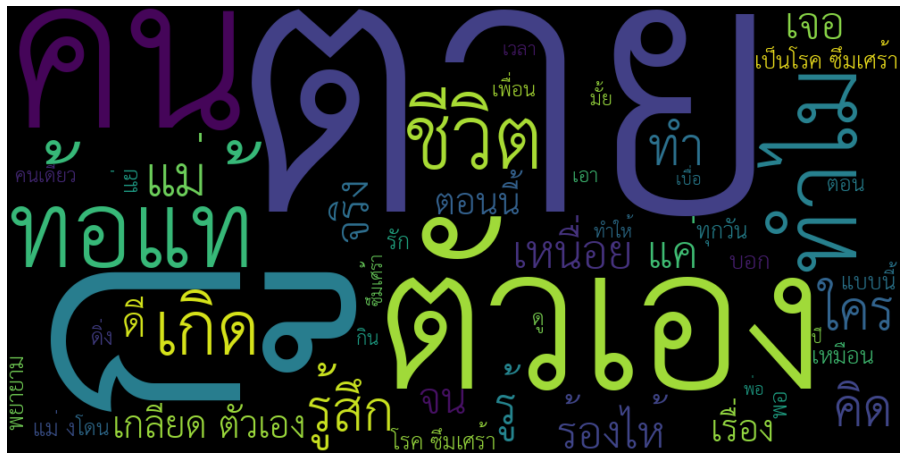

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words= 50,
    stopwords = thai_stopwords,).generate(str(' '.join(df[(df.keywords == 'ท้อแท้') | (df.label == 1)].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

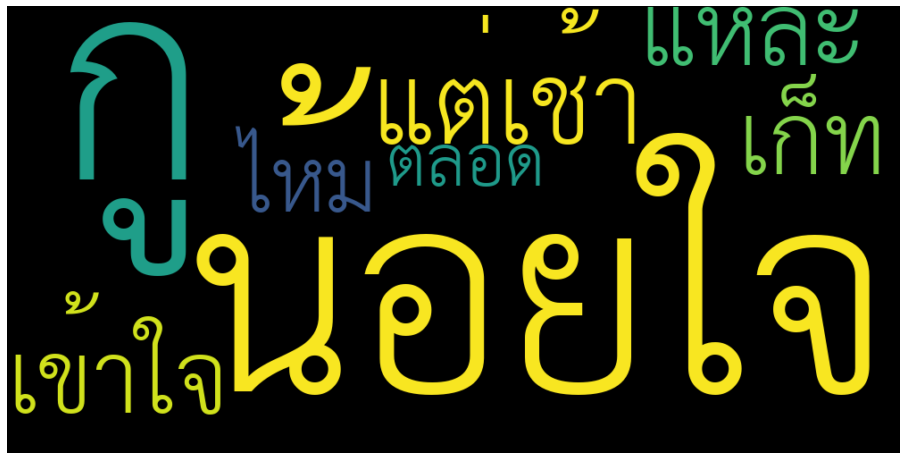

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','พี่','นี่',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','กก',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','เค้า','คุณ','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ']

wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words=10,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.keywords == 'น้อยใจ'].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# **Train Model**

In [ ]:
df

Column1  label       username      keywords  \
0           0      1        prtyfst  เกลียดตัวเอง   
1           1      1      fsj_hMoon       อยากตาย   
2           3      1  fromhellafter       อยากตาย   
3           4      1       Wiladda_       อยากตาย   
4           5      1     thawanpang       อยากตาย   
...       ...    ...            ...           ...   
1505     1507      0       khitaXXL  เกลียดตัวเอง   
1506     1508      0       mmyyyxx_    เกิดมาทำไม   
1507     1509      0   IO_from_Hell    เกิดมาทำไม   
1508     1510      0       giggokam    เกิดมาทำไม   
1509     1511      0         9uqmf1    เกิดมาทำไม   

                                                content  \
0                   เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้   
1                      เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย   
2     เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...   
3        ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ   
4                          อยากตายอยากตายอยากตายอยากตาย   
...                                                 ...   
1505  ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...   
1506  ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...   
1507  @BadStudent_ เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง...   
1508  (3) มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมี...   
1509  พวกมีแฟนแต่ทักหาคนไปทั่วเชิงชู้สาวแบบนี้เกิดมา...   

                                                  clean  \
0                   เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้   
1                      เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย   
2     เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...   
3        ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ   
4                          อยากตายอยากตายอยากตายอยากตาย   
...                                                 ...   
1505  ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...   
1506  ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...   
1507   เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง มึง หลอนหนั...   
1508   มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมีวูบ...   
1509  พวกมีแฟนแต่ทักหาคนไปทั่วเชิงชู้สาวแบบนี้เกิดมา...   

                                                  token  
0              เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้  
1                 เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย  
2     เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย...  
3     ปวดหัว ไม่ ไหว กับ อีก ทาง อห อยาก ตาย ตาม แม่...  
4                   อยาก ตาย อยาก ตาย อยาก ตาย อยาก ตาย  
...                                                 ...  
1505  ร้องไห้ เสียใจ อยู่ แต่ ดัน เจอ ผญ ตรง ไท ป์ ก...  
1506  ทำงาน จ - ส เป็น อะไร ที่ เหนื่อย มาก ใน ชีวิต...  
1507  เป็น ส้นตีน อะไร แดก ยา ไม่ ครบ รึ ไง มึง หลอน...  
1508  มี แต่ คำถาม มี แต่ คำพูด เข้ามา เอาจริง นะ มั...  
1509  พวก มี แฟน แต่ ทัก หา คน ไป ทั่ว เชิง ชู้สาว แ...  

[1510 rows x 7 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.token.values)

print(X.shape)
print(X.toarray())
print(vectorizer.get_feature_names_out())

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X.toarray())

x = tfidf.toarray()
y_true = df.label.to_numpy()

(1510, 2834)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['กก' 'กกก' 'กกระอ' ... 'ไอร' 'ไฮ' 'ไใ']


In [ ]:
y_true

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier



>**IGaussianNB**



In [ ]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3)

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Y_Predict (GaussianNB) = " , y_pred)
print("Confusion_matrix (GaussianNB) = ",confusion_matrix(y_test, y_pred))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred,average='weighted'), 2)))
print('F-measure (GaussianNB) = ',str(round(metrics.f1_score(y_test,y_pred,average='weighted'), 2)))

Y_Predict (GaussianNB) =  [1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0]
Confusion_matrix (GaussianNB) =  [[254 117]
 [ 46  36]

In [ ]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = model.predict(x_test)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, ))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       371
           1       0.48      0.43      0.45        82

    accuracy                           0.81       453
   macro avg       0.68      0.66      0.67       453
weighted avg       0.80      0.81      0.81       453



\

> **Decision Tree**



In [ ]:
modelfinal = tree.DecisionTreeClassifier(max_depth=4, class_weight='balanced')
modelfinal.fit(x_train, y_train)
y_pred = modelfinal.predict(x_test)

print("Y_Predict (Decision Tree) = " , y_pred)
print("Confusion_matrix (Decision Tree) = ",confusion_matrix(y_test, y_pred))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred,average='weighted'), 2)))
print('F-measure (Decision Tree) = ',str(round(metrics.f1_score(y_test,y_pred,average='weighted'), 2)))

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = modelfinal.predict(x_test)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, ))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       371
           1       0.43      0.52      0.48        82

    accuracy                           0.79       453
   macro avg       0.66      0.69      0.67       453
weighted avg       0.81      0.79      0.80       453





> **k-nearest neighbors**



In [ ]:
knn= neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)

print("Y_Predict (KN) = " , y_pred1)
print("Confusion_matrix (KN) = ",confusion_matrix(y_test, y_pred1))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred1), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred1,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred1,average='weighted'), 2)))
print('F-measure (KN) = ',str(round(metrics.f1_score(y_test,y_pred1,average='weighted'), 2)))

Y_Predict (KN) =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
Confusion_matrix (KN) =  [[344  27]
 [ 52  30]]
Accuracy =  0.



> **Artificial Neural Network**



In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
model.fit(x_train, y_train)
y_pred4 = model.predict(x_test)

print("Y_Predict (Neural Network) = " , y_pred4)
print("Confusion_matrix (Neural Network) = ",confusion_matrix(y_test, y_pred4))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred4), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred4,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred4,average='weighted'), 2)))
print('F-measure (Neural Network) = ',str(round(metrics.f1_score(y_test,y_pred4,average='weighted'), 2)))

Y_Predict (Neural Network) =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0]
Confusion_matrix (Neural Network) =  [[333  38]
 [

In [ ]:
# 0 Is Not Depressed
# 1 Is Depressed

inp = input()
cleaned = clean_tweet(inp)
print(cleaned)
print(my_tokenise(cleaned))
cleaned = vectorizer.transform([my_tokenise(cleaned)]).toarray()
print(cleaned)
result = modelfinal.predict(cleaned)
print('Result is',result)

เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้
เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้
เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้
[[0 0 0 ... 0 0 0]]
Result is [1]
